## Tensor Operations and GPU usage in PyTorch
This is to try out and play with torch tensor operations, loosely following the OpenHPI
course ["Practical Computer Vision with
PyTorch"](https://open.hpi.de/courses/computervision2025), which has a [course
repo](https://github.com/andandandand/practical-computer-vision), too. Here I am not so
interested in Computer Vision and more in PyTorch itself.

In [4]:
import skimage
import torch
import matplotlib.pyplot as plt 

%matplotlib inline

### 1. use of gpu in PyTorch: 
#### move model and data memory to do training and predictions

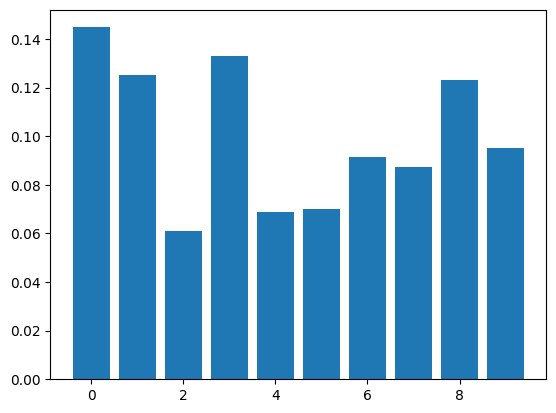

"plt.show(scores.cpu()) # scores.to('cpu') works, too\n\nplt.show(scores) # fails"

In [ ]:
# load data image
image_url = "https://raw.githubusercontent.com/andandandand/images-for-colab-notebooks/refs/heads/main/gujarat_indien.jpeg"
rgb_np_array = skimage.io.imread(image_url)
gray_image = skimage.color.rgb2gray(rgb_np_array)
gray_image_resized = skimage.transform.resize(gray_image, (28, 28), anti_aliasing=True)
flat_tensor = torch.tensor(gray_image_resized, dtype=torch.float32).flatten().unsqueeze(0)

# define simple model
model = torch.nn.Linear(in_features=28*28, out_features=10)

# move memory of model and data to gpu (if available)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
flat_tensor = flat_tensor.to(device)

# get prediction scores on gpu (if available)
scores = model(flat_tensor)

# do inspection back on cpu, where visualisation libraries such as matplotlib operate on
probs = torch.nn.functional.softmax(scores, dim=1).cpu().detach().numpy().flatten()
plt.bar(range(10), probs)
plt.show()


### 2. use of gpu in PyTorch: 
#### autograd calculations directly from tensors

In [9]:
# weight tensors (that we aim to learn) need to calculate gradient; X and y don't
w1 = torch.tensor([4.0], requires_grad=True)
x1 = torch.tensor([5.0], requires_grad=False)
y = torch.tensor([6.0], requires_grad=False)

# calculate loss (mimics forward-propagation)
L_1_loss = torch.abs(w1 * x1 - y)
print(L_1_loss)

# calculate gradient of the loss with respect to w1 (mimics backward-propagation)
L_1_loss.backward()
print(w1.grad)


tensor([14.], grad_fn=<AbsBackward0>)
tensor([5.])
